In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
INITIAL_PROPELANT_WEIGHT = 0.020  #Kg
SAMPLE_RATE = 80
time_constant = 1/SAMPLE_RATE
dataFile = 'Thursday 25 March 2021 01-47PM.csv'

In [16]:
with open(dataFile, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [17]:
a = np.array(data)
a = a.astype(float)
filtered = a[np.where(a > 0.5)]

In [18]:
filtered = np.append(filtered, 0)
filtered = np.insert(filtered, 0, 0)

In [19]:
burnTime = filtered.size * time_constant

In [20]:
t = np.linspace(0, burnTime, filtered.size)
thrust = 0.00981 * filtered
filtered

array([0.00000000e+00, 3.21111246e-02, 1.16285917e-01, 2.07475276e-01,
       1.49020559e-01, 5.51189012e-01, 3.17370144e-01, 3.80501238e-01,
       1.09598698e+00, 4.38955955e-01, 3.01002823e-01, 2.50965585e-02,
       6.00290975e-01, 2.96326446e-01, 2.65929993e-01, 3.71148484e-01,
       1.25638672e-01, 1.65387880e-01, 4.52985088e-01, 2.35533540e-01,
       4.95072484e-01, 1.79417012e-01, 1.70064257e-01, 2.09813465e-01,
       1.09271351e-01, 6.95221435e-02, 1.77078823e-01, 1.79417012e-01,
       1.20962295e-01, 1.84093389e-01, 1.39667804e-01, 8.12130869e-02,
       3.19708333e-01, 1.95784332e-01, 4.48308710e-01, 1.02256785e-01,
       6.14320107e-01, 4.56127613e+01, 3.16898765e+02, 3.94652892e+02,
       1.76308156e+02, 3.38446577e+01, 4.33204011e+00, 0.00000000e+00])

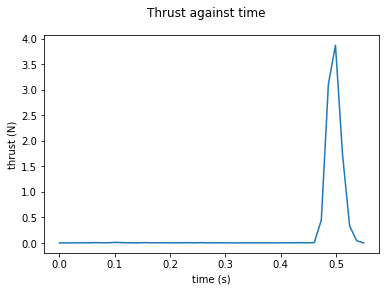

In [21]:
fig = plt.figure()
plt.plot(t, thrust)
fig.suptitle('Thrust against time')
plt.xlabel('time (s)')
plt.ylabel('thrust (N)')
fig.savefig('graph')

In [22]:
#total impulse
totalImpulse = np.sum(thrust) * time_constant
#specific impulse
specificImpulse = totalImpulse / INITIAL_PROPELANT_WEIGHT
#average thrust
avgThrust = totalImpulse / burnTime

In [23]:
def motorClass(totalImpulse):
    if totalImpulse > 5120:
        return 'M'
    elif totalImpulse > 2560:
        return 'L'
    elif totalImpulse > 1280:
        return 'K'
    elif totalImpulse > 640:
        return 'J'
    elif totalImpulse > 320:
        return 'I'
    elif totalImpulse > 160:
        return 'H'
    elif totalImpulse > 80:
        return 'G'
    elif totalImpulse > 40:
        return 'F'
    elif totalImpulse > 20:
        return 'E'
    elif totalImpulse > 10:
        return 'D'
    elif totalImpulse > 5:
        return 'C'
    elif totalImpulse > 2.5:
        return 'B'
    elif totalImpulse > 1.25:
        return 'A'
    elif totalImpulse > 0.625:
        return '1/2A'
    elif totalImpulse > 0.3126:
        return '1/4A'
    else:
        return 'micro'
    
Class = motorClass(totalImpulse)

In [24]:
st = "Total Impulse:\t\t{:.2f}\tN-sec \nSpecific Impulse:\t{:.2f}\tN-sec/Kg \nAverage Thrust:\t\t{:.2f}\tN"
print(st.format(totalImpulse, specificImpulse, avgThrust))
print("Motor Class:\t\t{}".format(Class))

Total Impulse:		0.12	N-sec 
Specific Impulse:	6.02	N-sec/Kg 
Average Thrust:		0.22	N
Motor Class:		micro


In [12]:
#Generate Rasp File
filename = input("Enter rasp file name")
filename = filename + ".eng"
f = open(filename, "a")

In [13]:
motorName = Class + str(int(avgThrust))
diameter = input("Enter Motor Diameter (mm): ")
Length = input("Input motor Length (mm): ")
delays = input("Input motor delays separated by dashes or P(plugged) for none: ")
pWeight = input("Propellant Weight (Kg): ")
totalWeight = input("Motor Total Weight (Kg): ")
manufucturer = "NKJ"

Enter Motor Diameter (mm): 19.05
Input motor Length (mm): 40
Input motor delays separated by dashes or P(plugged) for none: P
Propellant Weight (Kg): 15
Motor Total Weight (Kg): 20


In [15]:
#Write rasp file header
f.write("; NakujaProject" + motorName + "\n")
f.write("; from " + dataFile + "\n")
f.write("{} {} {} {} {} {} {} \n".format(motorName, diameter, Length, delays, pWeight, totalWeight, manufucturer))

29

In [23]:
thrustATime = np.array([t, thrust]).T
np.savetxt(f, thrustATime, delimiter=' ')

In [24]:
f.close()

In [14]:
t

array([0.        , 0.0127907 , 0.0255814 , 0.03837209, 0.05116279,
       0.06395349, 0.07674419, 0.08953488, 0.10232558, 0.11511628,
       0.12790698, 0.14069767, 0.15348837, 0.16627907, 0.17906977,
       0.19186047, 0.20465116, 0.21744186, 0.23023256, 0.24302326,
       0.25581395, 0.26860465, 0.28139535, 0.29418605, 0.30697674,
       0.31976744, 0.33255814, 0.34534884, 0.35813953, 0.37093023,
       0.38372093, 0.39651163, 0.40930233, 0.42209302, 0.43488372,
       0.44767442, 0.46046512, 0.47325581, 0.48604651, 0.49883721,
       0.51162791, 0.5244186 , 0.5372093 , 0.55      ])